In [1]:
import numpy as np   
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from scipy.stats import norm

In [2]:
# Pdf for one value in x and mean distributed in 100 parts from 0-10
x = 5
m = np.linspace(0,10,100)
Y_ax = norm.pdf(x, m, 1 )


Text(0, 0.5, 'PDF')

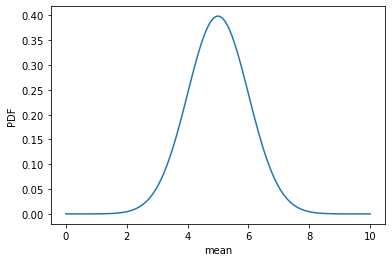

In [3]:

plt.plot(m, Y_ax)
plt.xlabel('mean')
plt.ylabel('PDF')

In [4]:
#for two value of x
x = 5  
x1 = 7
m = np.linspace(0,10,100)
Y_ax = norm.pdf(x, m, 1 )*norm.pdf(x1, m, 1 )

Text(0, 0.5, 'PDF')

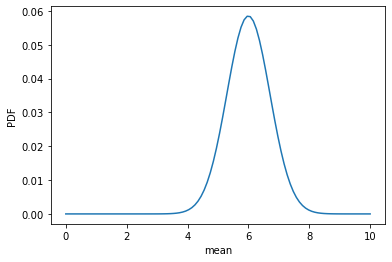

In [5]:
plt.plot(m, Y_ax)
plt.xlabel('mean')
plt.ylabel('PDF')


In [6]:
#pdf for 10 values of x
x = np.random.normal(5, 1,10)
m = np.linspace(0,10,100)

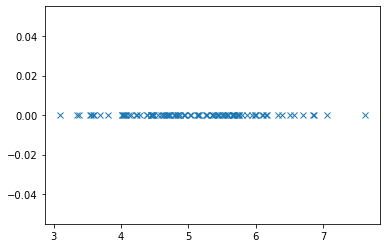

In [7]:
#Plot of randomly generated value of x with 100 values and mean of 5 along with fixed deviation of 1

val = 0. # this is the value where you want the data to appear on the y-axis.
x = np.random.normal(5, 1,100) # just as an example array
plt.plot(x, np.zeros_like(x) + val, 'x')
plt.show()

In [8]:
#Plot of pdf of randomly generated value of x with 10 values and mean of 5 along with fixed deviation of 1
ll = 0
for i in x:
    ll += np.log(norm.pdf(i, m, 1))

Text(0, 0.5, 'PDF')

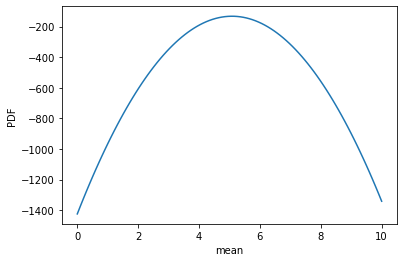

In [9]:
plt.plot(m, ll)
plt.xlabel('mean')
plt.ylabel('PDF')

In [10]:
ll = 1
for i in x:
   
    ll = ll*(norm.pdf(i, m, 1))

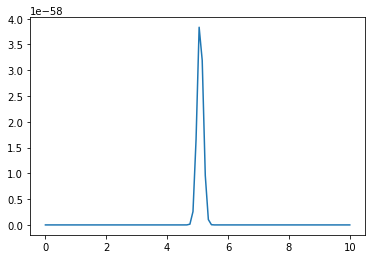

In [11]:

plt.plot(m, ll)

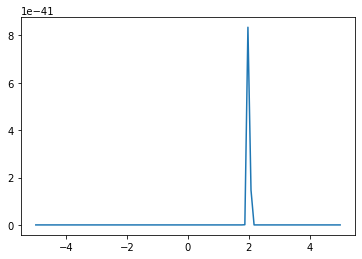

In [13]:
#plotting likelihood function
m = 2
x = np.linspace(-5,5,100)
y = m*x
w0 = np.linspace(-5,5,100)
def liklihood(x,u,w0):
    l = 1
    it = len(x)
    for i in range(it):
        l *= norm.pdf(w0*x[i],u[i],1)
    return l
plt.plot(w0,liklihood(x,y,w0))   #plotting without intercept

In [17]:
# with intercept
c=1
y1 = m*x + c
w0 = np.linspace(-10,10,100)
w1 = np.linspace(-10,10,100)
W0 , W1 = np.meshgrid(w0,w1)

In [18]:
def in_liklhood(x,u,W0,W1):                                  #function 1
    l = 1
    it = len(x)
    for i in range(it):
        l *= norm.pdf(W1*x[i]+W0,u[i],1)
    return l
def log_in_liklhood(x,u,W0,W1):                               #function 2
    l = 0
    it = len(x)
    for i in range(it):
        l += np.log(norm.pdf(W1*x[i]+W0,u[i],1))
    return l

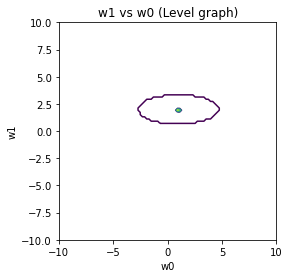

In [19]:

plt.gca().set_aspect('equal',adjustable = 'box')
plt.draw()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('w1 vs w0 (Level graph)')
plt.contour(W0,W1,in_liklhood(x,y1,W0,W1))

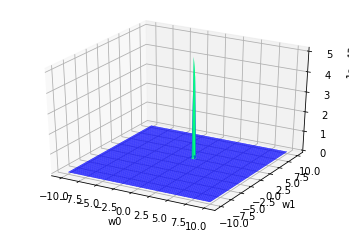

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel('w0')                                          #considering function 1
plt.ylabel('w1')
ax.plot_surface(W0, W1,in_liklhood(x,y1,W0,W1) , cmap='winter', rstride=1, cstride=1, edgecolor='none')

c:\users\tirufamily\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


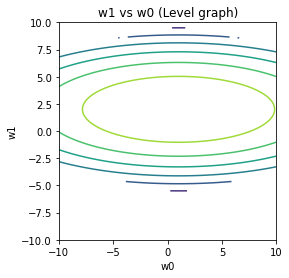

In [21]:
plt.gca().set_aspect('equal',adjustable = 'box')
plt.draw()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('w1 vs w0 (Level graph)')
plt.contour(W0,W1,log_in_liklhood(x,y1,W0,W1))                  #considering function 2